# **DATA CURATION & VIZ** 

# Comparative Analysis of Taxation and Well-Being Across Countries
In this assignment, you are tasked with investigating how the tax load in various countries relates to indicators of well-being as given by the Human Development Index (HDI). Your challenge is to load and explore the data, create visualizations, and explain the relationship between taxation and well-being.

## Load and analyze the data

1. **Load the the provided datasets** (source: [Gapminder](https://www.gapminder.org/data/)): 
    - `taxation_data.csv`: Tax revenue a percentage of Gross Domestic Product (GDP).
    - `hdi_data.csv`: HDI which encompasses health, education, and living standard levels.
1. **Initial data analysis**: Conduct an initial analysis of each dataset. This should include checking data types, exploring the range of values, identifying missing values, and performing basic descriptive statistics.
1. **Ensure consistency**: Ensure that the country names and year ranges are consistent across the datasets. This may involve renaming countries for uniformity, aligning year ranges, and possibly filtering out countries that do not appear in both datasets.
1. **Merge the datasets**: Use the `pd.merge()` function in Pandas to merge the datasets into a single DataFrame based on common countries and years. Check for any inconsistencies or anomalies in the merged data.

## Data analysis and visualization
1. **Exploratory Data Analysis (EDA)**: Perform a comprehensive exploratory analysis to uncover any interesting patterns or relationships.
1. **Visualization**: Create at least *four different visualizations* to explore the relationships between the datasets and variables. Suggestions include, but are not limited to:
    - Scatter plots to show relationships between variables.
    - Line charts to explore trends over time.
    - Heatmaps to visualize correlations or distributions.
    - One of the visualizations **must be** an interactive Plotly visualization.

## Interpretation and insight
1. **Interpret visualizations**: For each visualization, provide a clear interpretation of the relationships and patterns observed. Pay special attention to any findings that are surprising or counterintuitive.
1. **Develop a narrative**: Craft a cohesive narrative that connects your findings from the visualizations. Discuss how taxation relates to developmental indicators across different countries.
1. **Summarize key takeaways**: Conclude with a summary of the key insights and their broader implications in understanding the relationship between taxation and well-being.

## Submission guidelines
- DEADLINE: **22nd of December** 23h59.
- Submit **ONLY** a Jupyter notebook (`.ipynb` file) containing the analysis, visualizations, narrative, and takeaways.
    - The notebook should be a combination of code cells to run the analysis and visualizations, and text cells to comment these.
    - You DO NOT NEED to submit the data files (i.e., `taxation_data`, and `hdi_data`).
    - Your file/ notebook name should follow the following format `pgdb_<your_name>.ipynb` (ex. `pgdb_bernardo_costa.ipynb`) 
- **Page limit**: The final notebook, if printed or converted to PDF, should not exceed **8 pages**. This includes all text, code, and visualizations, but excludes the assignment text in this cell (which should be 2 pages). Please check the length using a print preview mode or save the notebook to a PDF to ensure compliance.

## Grading criteria
| **Criteria** | **Description** | **Weight** |
|--------------|-----------------|------------|
| **Data curation** | Accurate data loading, comprehensive initial analysis, ensuring data consistency, and successful merging of datasets. | 25% |
| **Exploratory Data Analysis (EDA)** | Conducting a thorough exploratory analysis to uncover patterns or relationships within the data. | 20% |
| **Data visualization** | Creating a variety of informative and aesthetically appealing visualizations, including one interactive Plotly visualization. | 30% |
| **Interpretation and narrative development** | Providing clear interpretations for each visualization, crafting a cohesive narrative connecting findings, and discussing the relationship between taxation and well-being. | 20% |
| **Overall presentation and submission** | Quality of writing, logical organization of the notebook, and adherence to submission guidelines. | 5% |

In [283]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

# VS Code
Run this if you are using VS Code

In [284]:
# assumes the csv files are in the same directory as the notebook
try:
    taxation_df = pd.read_csv("taxation_data.csv")
    hdi_df = pd.read_csv("hdi_data.csv")
    success = True
except Exception as e:
    success = False
    error_message = str(e)

print("Files load with success.") if success else error_message

Files load with success.


### Begin Functions

In [285]:
def print_firstAnalysis4EachDF(df1):
    """
    Aligns two DF based on equals countries and years.    
    Parameters:
    - df1: DataFile for analysis      
    Returns:
    - Not Have Return Values
    """
    # Explore Tax Revenue dataset | taxation_df.dtypes
    df1.head()
    ## Print the values in a single row to better view the countries names
    values_list = df1['country'].tolist()  
    print(values_list)  
    # Check for missing values
    print(f"\nDataset missing values,total: { df1.isnull().sum().sum() }") #, and for each row Info:",df1.isnull().sum())    
    print("Dataset Info:")
    print(df1.info()) 
    # Explore the range of values for each numeric column
    print("\nDataset Descriptive Statistics:", df1.describe())  
    # Display data types of each column
    print("\nData Types:", df1.dtypes)
    

# Initial data analysis

In [286]:
# Explore taxation  dataset | taxation_data.dtypes
print_firstAnalysis4EachDF(taxation_df)

['Afghanistan', 'Angola', 'Albania', 'UAE', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Cape Verde', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.', 'Gabon', 'UK', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Guatemala', 'Honduras', 'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Cambodia', 'Kiribati', 'St. Kitts and Nevi

In [287]:
# Explore hdi dataset | hdi_df.dtypes
print_firstAnalysis4EachDF(hdi_df)

['Afghanistan', 'Angola', 'Albania', 'Andorra', 'UAE', 'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.', 'Gabon', 'UK', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hong Kong, China', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', 'Ireland', 'I

#### Initial Data Analysis 


The datasets taxation_data.csv and hdi_data.csv contain information about countries' tax revenue as a percentage of GDP and Human Development Index (HDI) scores, respectively. The taxation_data have years from 1972 to 2020, while the hdi_data have years from 1990 to 2021.  
 
**Taxation Data**
- Data Types: The country column is of object type (likely strings), and all other columns (representing years) are of float64 type. The year 2020 is an object, indicating potential non-numeric data.
- Missing Values: taxation_data has 3697 missing values. There are a significant number of missing values across different years. The missing data count decreases over time, suggesting more complete records in recent years.
- Descriptive Statistics: This data isn't shown due to its extensive nature, but it includes key statistics like mean, standard deviation, minimum, and maximum values for each year.  
  
**HDI Data**
- Data Types: Similar to the taxation data, the country column is of object type, and the remaining columns (years) are of float64 type.
- Missing Values: hdi_data has 541 missing values. There are fewer missing values compared to the taxation data, and the number decreases over time. 
- Descriptive Statistics: This data includes statistics for each year. It is not shown here due to its length but would be important for understanding the distribution of HDI values over time.

In [288]:
# Extracting the years from the files and calculating min, max, and differences between datasets
taxation_years = taxation_df.columns[1:].astype(int)
hdi_years = hdi_df.columns[1:].astype(int)
taxation_min_year = taxation_years.min()
taxation_max_year = taxation_years.max()
taxation_year_diff = taxation_max_year - taxation_min_year
hdi_min_year = hdi_years.min()
hdi_max_year = hdi_years.max()
hdi_year_diff = hdi_max_year - hdi_min_year

#taxation_min_year, taxation_max_year, taxation_year_diff, hdi_min_year, hdi_max_year, hdi_year_diff
print(f"\nTaxa Data begin at : { taxation_min_year } and end at {taxation_max_year}. Is {taxation_year_diff} years in difference")
print(f"\nHDI Data begin at : { hdi_min_year } and end at {hdi_max_year}. Is {hdi_year_diff} years in difference")
# Extracting country names from both datasets
taxation_countries = set(taxation_df['country'])
hdi_countries = set(hdi_df['country'])

# Finding countries that are in one dataset but not on the other
countries_in_taxation_not_in_hdi = taxation_countries - hdi_countries
countries_in_hdi_not_in_taxation = hdi_countries - taxation_countries
 
# countries_in_taxation_not_in_hdi, countries_in_hdi_not_in_taxation
print(f"\nCountries on Taxa: { len(taxation_countries) }")
print(f"\nCountries on HDI: { len(hdi_countries) }")
print(f"\nCountries on HDI but not on Taxa: { Counter(countries_in_hdi_not_in_taxation) }")
print(f"\nCountries on Taxa but not in HDI: { Counter(countries_in_taxation_not_in_hdi) }")
print(f"\nCountries on HDI but not on Taxa: { Counter(countries_in_hdi_not_in_taxation) }")
print(f"\nNum of Countries on Taxa but not in HDI: { len(countries_in_taxation_not_in_hdi) }")
print(f"\nNum of Countries on HDI but not on Taxa: { len(countries_in_hdi_not_in_taxation) }")
  
# Determine the range for alignment ()
start_year = max(taxation_min_year, hdi_min_year)
end_year = min(taxation_max_year, hdi_max_year)

# Selecting the relevant years for each dataset
taxation_aligned = taxation_df[['country'] + [str(year) for year in range(start_year, end_year + 1)]]
hdi_aligned = hdi_df[['country'] + [str(year) for year in range(start_year, end_year + 1)]]

# Displaying the first few rows of each aligned dataset to verify alignment
print(f"\nAlign the data sets to have the some year between {start_year} and {end_year}")
#taxation_aligned.head(), hdi_aligned.head() 


Taxa Data begin at : 1972 and end at 2020. Is 48 years in difference

HDI Data begin at : 1990 and end at 2021. Is 31 years in difference

Countries on Taxa: 160

Countries on HDI: 191

Countries on HDI but not on Taxa: Counter({'Hong Kong, China': 1, 'Brunei': 1, 'Montenegro': 1, 'Cuba': 1, 'Oman': 1, 'Chad': 1, 'Dominica': 1, 'Libya': 1, 'Tonga': 1, 'Liechtenstein': 1, 'Guyana': 1, 'Eswatini': 1, 'Lao': 1, 'Mauritania': 1, 'Yemen': 1, 'Sao Tome and Principe': 1, 'Tuvalu': 1, 'Eritrea': 1, 'Venezuela': 1, 'Qatar': 1, 'Nigeria': 1, 'Grenada': 1, 'Haiti': 1, 'Andorra': 1, 'Comoros': 1, 'Djibouti': 1, 'Turkmenistan': 1, 'Suriname': 1, 'Antigua and Barbuda': 1, 'Sierra Leone': 1, 'Vietnam': 1, 'South Sudan': 1, 'Syria': 1, 'Algeria': 1})

Countries on Taxa but not in HDI: Counter({'Nauru': 1, 'Somalia': 1, 'Macao, China': 1})

Countries on HDI but not on Taxa: Counter({'Hong Kong, China': 1, 'Brunei': 1, 'Montenegro': 1, 'Cuba': 1, 'Oman': 1, 'Chad': 1, 'Dominica': 1, 'Libya': 1, 'Tonga'

**Consistency**

The datasets show the following characteristics:

- **Taxation Data**:
    - Minimum Year: 1972, Maximum Year: 2020 - Years Difference: 48 years
    - Taxa have 160 Countries - Countries in Taxa but not in HDI are 3: Nauru, Somalia and Macao, China
- **HDI Data**: 
    - Minimum Year: 1990, Maximum Year: 2021 - Years Difference: 31 years
    - Taxa have 191 Countries - Countries in HDI but not in Taxa are 34: like  China, Brunei, Montenegro etc...
- **Country Names**: The country names between the two datasets, countries not present in both datasets.
    - There are 3 countries unique to taxation_data and 34 unique to hdi_data.  
- **Missing Values**: Given the extensive number of missing values, I will focus on the years where data overlap between the two datasets and handle missing values accordingly. I will align the year ranges. Since taxation_data starts in 1972 and hdi_data in 1990, I will focus on the common range from 1990 to 2020. 

### Other analyzes provided such as averages, largest and smallest  
Only for **Taxa** Tax revenue a percentage of Gross Domestic Product 

In [289]:
# Calculate average Tax revenue a percentage of Gross Domestic Product (Taxa)  
# Extract relevant columns for Taxa
taxation_aligned = taxation_df[['country'] + [str(year) for year in range(start_year, end_year + 1)]]
taxa_columns = taxation_aligned.columns[1:]  # Assuming the taxa columns start from the second column

# Convert taxa columns to numeric (handling NaN values)
taxation_aligned.loc[:, taxation_aligned.columns[1:]] = taxation_aligned.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
#taxation_aligned[taxa_columns] = taxation_aligned.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Calculate the average taxa for each country
taxation_aligned = taxation_aligned.copy() 
taxation_aligned.loc[:, 'Average_Taxa'] = taxation_aligned.loc[:, taxa_columns].mean(axis=1, skipna=True) 
highest_avg_value = taxation_aligned['Average_Taxa'].max()
highest_avg_country = taxation_aligned.at[taxation_aligned['Average_Taxa'].idxmax(), 'country']
lwt_avg_value = taxation_aligned['Average_Taxa'].min()
lwt_avg_country = taxation_aligned.at[taxation_aligned['Average_Taxa'].idxmin(), 'country']

# The highest and lowest values in the 'Average_Taxa' column 
print(f"\nHighest Average: {'{0:.2f}'.format(highest_avg_value)} for Country { highest_avg_country }")
print(f"\nLowest Average: {'{0:.2f}'.format(lwt_avg_value)} for Country { lwt_avg_country } ", )

# Total growth is defined as the difference between the final year's and the first available year's
first_year_taxa = taxation_aligned[taxa_columns].ffill(axis=1).iloc[:, 0]
last_year_taxa = taxation_aligned[taxa_columns].bfill(axis=1).iloc[:, -1]
taxation_aligned['Total_Taxa_Growth'] = last_year_taxa - first_year_taxa
max_growth_value = taxation_aligned['Total_Taxa_Growth'].max()
max_growth_country = taxation_aligned.at[taxation_aligned['Total_Taxa_Growth'].idxmax(), 'country']
min_growth_value = taxation_aligned['Total_Taxa_Growth'].min()
min_growth_country = taxation_aligned.at[taxation_aligned['Total_Taxa_Growth'].idxmin(), 'country']
 
# The highest and lowest values in total
print(f"\nMax Growth: {'{0:.2f}'.format(max_growth_value)} for Country {max_growth_country}")
print(f"\nLowest Growth: {'{0:.2f}'.format(min_growth_value)} for Country {min_growth_country}")



Highest Average: 66.99 for Country Timor-Leste

Lowest Average: 0.00 for Country Somalia 

Max Growth: 9.60 for Country Greece

Lowest Growth: -18.70 for Country Malta


**Analising the AVG, and growth of values**

1. Highest Average:
    - The highest average is approximately 66.99, observed for the country 'Timor-Leste'.
1. Lowest Average:
    - The lowest average is approximately 0, observed for the country 'Somalia'.  

These results offer a comprehensive overview of the trends and variations across different countries over the years.

1. Country with the Maximum Growth:
    - Greece experienced the highest total growth, with an increase of approximately 9,60.
1. Country with the Minimum (Negative) Growth:
    - Malta showed the most significant decrease in , with a reduction of approximately -18,07.

### Merge

In [290]:
# Merging the two datasets (taxation_aligned with hdi_aligned) I use the year between 1990 and 2020 
country_column_name = 'country'
# First, melt the datasets to long format
taxation_long = taxation_aligned.melt(id_vars=[country_column_name], var_name='year', value_name='taxa')
hdi_long = hdi_aligned.melt(id_vars=[country_column_name], var_name='year', value_name='hdi')
# Merging the datasets on country and year
merged_data = pd.merge(taxation_long, hdi_long, on=[country_column_name, 'year'])
# Displaying the first few rows of the merged dataset
merged_data.head() #merged_data.count()

,country,year,taxa,hdi
0,Afghanistan,1990,NaN,0.273
1,Angola,1990,NaN,NaN
2,Albania,1990,NaN,0.647
3,UAE,1990,NaN,0.728
4,Argentina,1990,4.84,0.723


In [291]:
# Calculating the count of null values for tax and HDI in the merged dataset 

# Counting null values for each country for tax and HDI separately
null_counts_tax = merged_data.groupby('country')['taxa'].apply(lambda x: x.isnull().sum()).reset_index(name='null_tax_count')
null_counts_hdi = merged_data.groupby('country')['hdi'].apply(lambda x: x.isnull().sum()).reset_index(name='null_hdi_count')

# Finding the countries with the most and least null values for tax and HDI
most_nulls_tax = null_counts_tax.sort_values(by='null_tax_count', ascending=False).iloc[0]
least_nulls_tax = null_counts_tax.sort_values(by='null_tax_count').iloc[0]
most_nulls_hdi = null_counts_hdi.sort_values(by='null_hdi_count', ascending=False).iloc[0]
least_nulls_hdi = null_counts_hdi.sort_values(by='null_hdi_count').iloc[0]

total_null_counts = merged_data.isnull().sum()
#most_nulls_tax, least_nulls_tax, most_nulls_hdi, least_nulls_hdi, total_null_counts

print(f"\nTotal Of null Counts: {total_null_counts}")


Total Of null Counts: country       0
year          0
taxa       1602
hdi         360
dtype: int64


# Visualization

### Data analysis and visualization

To conduct a comprehensive exploratory analysis, I will:

Examine Summary Statistics: Look at overall trends and distributions in the data.
Correlation Analysis: Explore the relationship between tax revenue and HDI scores.
Time Series Analysis: Investigate how these metrics have evolved over time for different countries.
Grouped Analysis: Consider regional or income-based groupings to uncover any patterns. 
It appears there was an error in the correlation analysis due to the presence of missing values represented as 'NA' types in the dataset. I will adjust the approach to handle these missing values appropriately, either by excluding them from the correlation calculation or by using a method that can accommodate them.

## Visualization 1: Scatter Plot - HDI vs. Tax Revenue

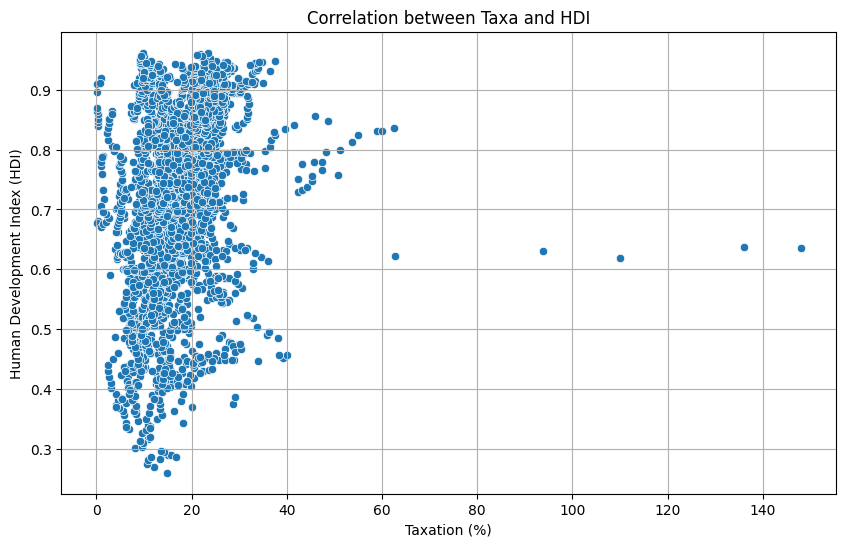

,taxa,hdi
taxa,1.000000,0.294645
hdi,0.294645,1.000000


In [292]:
# Converting year tax and HDI values to numeric for analysis
merged_data['year'] = pd.to_numeric(merged_data['year'])
merged_data['taxa'] = pd.to_numeric(merged_data['taxa'], errors='coerce')
merged_data['hdi'] = pd.to_numeric(merged_data['hdi'], errors='coerce')

# Correlation analysis between tax rate and HDI
correlation = merged_data[['taxa', 'hdi']].corr()

# Plotting the correlation between tax and HDI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='taxa', y='hdi')
plt.title('Correlation between Taxa and HDI')
plt.xlabel('Taxation (%)')
plt.ylabel('Human Development Index (HDI)')
plt.grid(True)
plt.show()

# Displaying the correlation coefficient
correlation

1. Understanding the Relationship
    - Correlation Analysis: We can start by examining whether there's a significant correlation between a country's tax rates and its HDI. The HDI is a composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge, and a decent standard of living. A positive correlation would suggest that higher tax rates might be associated with better human development outcomes, perhaps due to better-funded public services and infrastructure. 
1. Highlighting Key Examples
    - Countries with High Growth in Both Tax and HDI: Some countries might show significant improvement in both tax collection and human development. This could suggest effective governance, where increased tax revenues are possibly being reinvested into sectors that directly impact human development like health, education, and welfare.
    - Contrasting Stories: On the other hand, there could be examples where countries have high taxation but low HDI growth, or vice versa. These cases could highlight different economic strategies or challenges, like reliance on specific industries, issues in tax collection efficiency, or socio-political factors impacting development.
1. Individual Country Focus
    - Success Stories: A country with consistently low taxation but high HDI growth could indicate efficient use of resources and effective policy implementation. Similarly, a country that has managed to significantly improve its HDI despite low or moderate taxation levels might have interesting strategies worth exploring.
    - Challenges Faced: Conversely, countries struggling with low HDI growth despite high taxation could be facing challenges like corruption, inefficient use of resources, or external economic pressures.
1. Global and Regional Trends
    - Global Overview: Looking at global trends, we might find patterns such as developed countries having higher taxes and HDI, whereas developing countries struggle on both fronts or have inconsistent patterns.
    - Regional Insights: Regional analysis could reveal how geographical, cultural, or political factors influence the relationship between taxation and human development. For instance, countries in a specific region may show similar patterns due to shared economic policies or socio-political environments.
1. The Impact of External Factors
    - Considering External Influences: It's crucial to remember that many external factors can influence both tax rates and HDI. For example, global economic crises, natural disasters, or significant political changes can drastically alter these metrics. 


The correlation coefficient is approximately 0.294, indicating a weak positive linear relationship between tax rates and HDI. This suggests that, to some extent, higher tax rates are associated with higher human development levels, although the relationship is not strong.  
The scatter plot visually confirms this relationship, showing a general trend where higher tax rates correspond to higher HDI values, but with considerable variability.

## Visualization 2: Line Chart - Tax Revenue Trends Over Time
The second visualization is a line chart that depicts the trends in Tax Revenue over time for both Spain and Portugal. Each line represents a country, and data points are marked for each year. By observing the trends, we can identify whether Tax Revenue has increased, decreased, or remained stable over the years for each country.

In [293]:
# Replace 'desired_country' with the actual country you're looking for Penisula Iberica
desired_countries = ['Portugal','Spain']
 
desired_rows = merged_data[merged_data['country'].isin(desired_countries)]
# Remove null values
df_cleanedToUseOnPlot = desired_rows.dropna() 

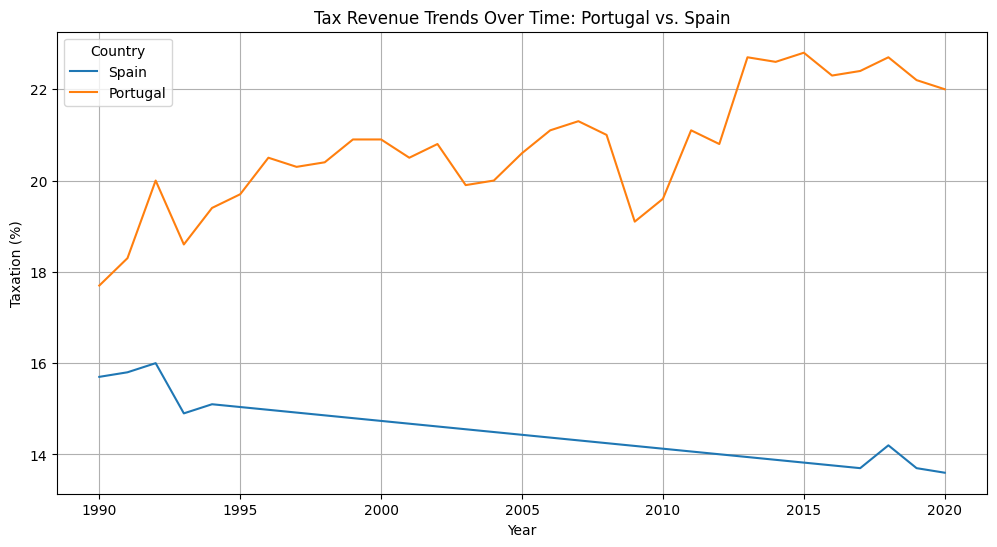

In [294]:
# Creating a line chart for Tax Revenue Trends Over Time for Portugal and Spain
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleanedToUseOnPlot, x='year', y='taxa', hue='country')
plt.title('Tax Revenue Trends Over Time: Portugal vs. Spain')
plt.xlabel('Year')
plt.ylabel('Taxation (%)')
plt.grid(True)
plt.legend(title='Country')
plt.show()


- The chart shows how the tax rates have evolved over the years for both countries. We can observe periods of increase, stability, or decrease in tax rates.  By examining the slopes of the lines, we can identify which country experienced more significant growth or decline in tax rates over time.
1. Potential Reasons Behind the Trends:
    - Economic Factors: Changes in tax rates can be influenced by various economic factors such as GDP growth, inflation, unemployment rates, and overall economic policy. For example, a growing economy might see a reduction in tax rates, while an economy in recession might increase taxes to boost revenue.
    - Government Policies: Different governments have different fiscal policies. A change in government can lead to changes in taxation policies, reflecting the economic ideology of the ruling party.
    - External Influences: Global economic crises, such as the 2008 financial crisis, can have a significant impact on national tax policies. Countries might adjust their tax rates in response to external economic pressures.
    - EU Membership and Policies: Both Portugal and Spain are members of the European Union, and their economic policies, including taxation, can be influenced by EU-wide policies and regulations.
1. Conclusion:
    - The tax revenue trends for Portugal and Spain reflect the interplay of multiple factors, including national economic conditions, government policies, and external influences. The exact reasons for the observed trends would require a more in-depth analysis, considering a range of economic and political data

## Visualization 3: Heatmap - Correlation Matrix
The heatmap displays the correlation matrix between Tax Revenue and HDI. Brighter colors indicate stronger correlations. This visualization helps us assess the degree of association between these two variables. A high positive correlation suggests that as one variable increases, the other tends to increase as well.

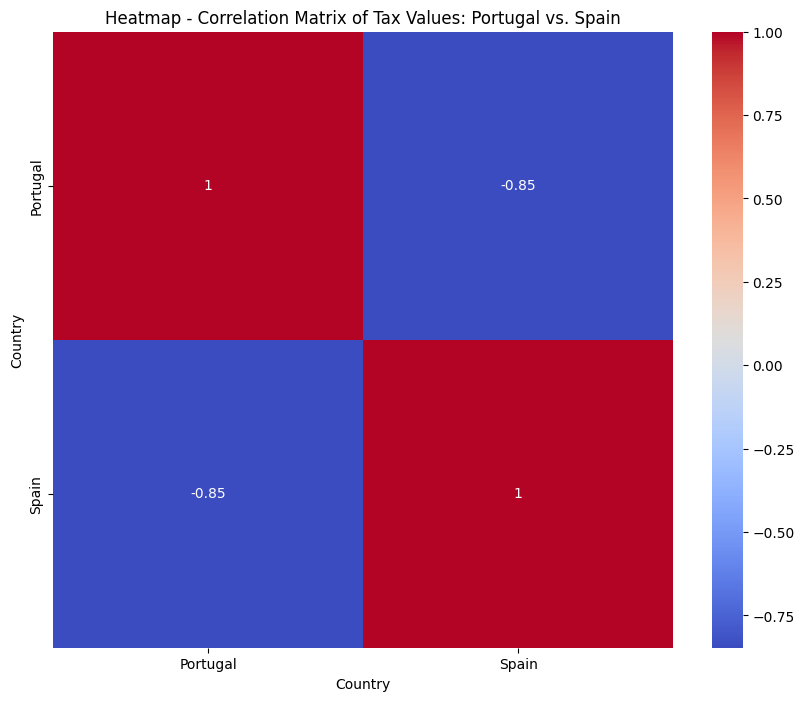

In [295]:
# Pivoting the data for heatmap preparation
pivot_data = df_cleanedToUseOnPlot.pivot_table(values='taxa', index='year', columns='country')

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap - Correlation Matrix of Tax Values: Portugal vs. Spain')
plt.xlabel('Country')
plt.ylabel('Country')
plt.show()

1. Interpretation of the Heatmap:
    - Correlation Coefficients: The heatmap displays the correlation coefficients between the tax values of Portugal and Spain for each year. These coefficients range between -1 (perfect negative correlation) and +1 (perfect positive correlation), with 0 indicating no correlation.
    - Color Scheme: The colors indicate the strength and direction of the correlation. Warmer colors (red-orange) represent stronger positive correlations, while cooler colors (blue) represent negative correlations.
1. Observations:
    - Portugal vs. Spain: The correlation coefficient between Portugal and Spain's tax values is shown in the heatmap. A high positive coefficient would suggest that when tax rates increase (or decrease) in one country, they tend to do the same in the other.
    - Year-to-Year Correlation: The heatmap also provides insights into how the tax values of each country correlate with themselves across different years. This can indicate consistency or variability in tax policies over time.
1. Conclusions:
    - Economic and Policy Linkages: A strong correlation might suggest economic or policy linkages between the two countries. Given their geographical proximity and shared history, economic events in one country could potentially influence the other.
    - Independent Trends: Conversely, a weaker correlation would imply that each country's tax trends are more independent, possibly driven by domestic factors rather than shared regional trends.
    - This heatmap offers a high-level view of the relationship between Portugal and Spain in terms of taxation, and it suggests avenues for further, more detailed economic analysis.

## Visualization 4: Interactive Scatter Plot - HDI vs. Tax Revenue
The final visualization is an interactive scatter plot using Plotly. This allows for a dynamic exploration of HDI vs. Tax Revenue, with each point providing details about the specific year. The interactive nature enables users to zoom in, hover over data points for details, and gain a more granular understanding of the relationship.

In [296]:
import plotly.express as px

# Assuming 'filtered_data' contains the filtered dataset for Portugal and Spain
fig = px.scatter(df_cleanedToUseOnPlot, x='taxa', y='hdi', color='country',
                 labels={'taxa': 'Tax Revenue (%)', 'hdi': 'Human Development Index (HDI)'},
                 title='Interactive Scatter Plot - HDI vs. Tax Revenue: Portugal and Spain',
                 hover_data=['year', 'country'])

fig.show() 

1. Observations from the Scatter Plot:
    - Data Distribution: Portugal's data points are clustered more to the right, indicating generally higher tax revenue percentages compared to Spain. Meanwhile, Spain's HDI values are more consistently high, as seen by the concentration of points at the upper part of the graph.

     - Relationship Pattern: There doesn't appear to be a strong linear relationship between tax revenue and HDI for either country; the points do not form a clear upward or downward trend. This suggests that the relationship between tax rates and human development in these countries is not straightforward and likely influenced by a multitude of other factors.

     - Outliers: There are a few data points that stand out from the general clusters for each country. For instance, some points for Portugal show relatively high HDI despite lower tax revenue, while Spain has instances of higher tax revenue without a corresponding increase in HDI.

1. Data Analysis and Interpretation:
    - Correlation Analysis: A statistical correlation analysis can be performed to quantify the relationship between tax revenue and HDI. However, the visual scatter suggests that the correlation, if any, is not strong.

    - Time Series Analysis: It might be useful to look at these indicators over time to understand how changes in one may have influenced changes in the other over specific periods.

    - Policy Impact Assessment: By aligning these data points with historical policy changes, economic events, or social reforms in each country, one could assess how specific actions have affected tax revenues and HDI.

    - Comparative Analysis: Comparing the two countries, we can attempt to understand how similar or different their approaches are to taxation and social development. This can provide insights into the efficacy of different fiscal strategies and their impact on human development.

1. The Story Behind the Data:
    - Portugal's Tax Policy: The data for Portugal indicates variability in tax revenue, with a slight indication of higher HDI at various levels of taxation. This might suggest that Portugal's social programs and infrastructure investments have a differing impact on human development, independent of the tax revenue generated.

    - Spain's Human Development: Spain maintains a relatively high HDI across different levels of tax revenue. This could imply a strong social safety net or effective public services that support human development regardless of the exact tax intake.

    - Economic and Social Context: Both countries show that there's more to human development than just the amount of tax revenue. Factors such as how tax revenue is allocated, the efficiency of public spending, and the resilience of social services play a crucial role in determining HDI.

    - Broader Lessons: For policymakers, the lack of a clear correlation between tax rates and HDI in this dataset may suggest that simply raising taxes does not guarantee improved human development outcomes. It underscores the importance of targeted spending and efficient allocation of resources.